In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [219]:
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix


In [220]:
import pandas as pd
df=pd.read_csv("final_data.csv")

In [221]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,GDS,Portugal,International,Transient,Contract,Transient-Party,Group,No_Deposit,Non_Refund,Refundable
0,2,0,0,7,2015,7,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,3,0,0,13,2015,7,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,4,0,0,14,2015,7,2,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,5,0,0,14,2015,7,2,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,6,0,0,0,2015,7,2,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [222]:
df["reserved_room_type"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [223]:
df["R0"] = df['reserved_room_type'].apply(lambda x: 1 if x == '0' else 0) 

df["R1"] = df['reserved_room_type'].apply(lambda x: 1 if x == '1' else 0) 

df["R2"] = df['reserved_room_type'].apply(lambda x: 1 if x == '2' else 0) 

df["R3"] = df['reserved_room_type'].apply(lambda x: 1 if x == '3' else 0) 

df["R4"] = df['reserved_room_type'].apply(lambda x: 1 if x == '4' else 0) 

df["R5"] = df['reserved_room_type'].apply(lambda x: 1 if x == '5' else 0) 

df["R6"] = df['reserved_room_type'].apply(lambda x: 1 if x == '6' else 0) 

df["R7"] = df['reserved_room_type'].apply(lambda x: 1 if x == '7' else 0)

df["R8"] = df['reserved_room_type'].apply(lambda x: 1 if x == '8' else 0) 


In [224]:
df["assigned_room_type"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [225]:
df["A0"] = df['assigned_room_type'].apply(lambda x: 1 if x == '0' else 0) 

df["A1"] = df['assigned_room_type'].apply(lambda x: 1 if x == '1' else 0) 

df["A2"] = df['assigned_room_type'].apply(lambda x: 1 if x == '2' else 0) 

df["A3"] = df['assigned_room_type'].apply(lambda x: 1 if x == '3' else 0) 

df["A4"] = df['assigned_room_type'].apply(lambda x: 1 if x == '4' else 0) 

df["A5"] = df['assigned_room_type'].apply(lambda x: 1 if x == '5' else 0) 

df["A6"] = df['assigned_room_type'].apply(lambda x: 1 if x == '6' else 0) 

df["A7"] = df['assigned_room_type'].apply(lambda x: 1 if x == '7' else 0)

df["A8"] = df['assigned_room_type'].apply(lambda x: 1 if x == '8' else 0) 

df["A9"] = df['assigned_room_type'].apply(lambda x: 1 if x == '9' else 0)

df["A10"] = df['assigned_room_type'].apply(lambda x: 1 if x == '10' else 0)

In [226]:
df.drop('assigned_room_type', inplace=True, axis=1)

In [227]:
df.drop('reserved_room_type', inplace=True, axis=1)

In [228]:
df

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,2,0,0,7,2015,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,13,2015,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,14,2015,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,14,2015,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,2015,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118333,119385,1,0,23,2017,8,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118334,119386,1,0,102,2017,8,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118335,119387,1,0,34,2017,8,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118336,119388,1,0,109,2017,8,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
train_var = df.drop(['is_canceled'], axis=1).iloc[:,1:]
test_var = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((94670, 54), (94670,), (23668, 54), (23668,))

## Logistic Regression

In [231]:
#Data Scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

Average cross validation score: 0.790
Test accuracy: 0.791
F1 score: 0.672
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     14898
           1       0.80      0.58      0.67      8770

    accuracy                           0.79     23668
   macro avg       0.80      0.75      0.76     23668
weighted avg       0.79      0.79      0.78     23668



<AxesSubplot:>

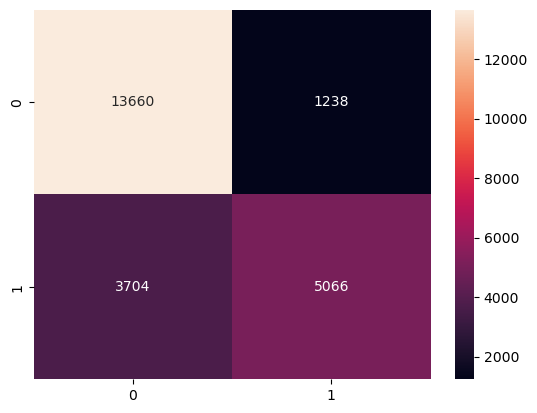

In [232]:
import warnings
warnings.filterwarnings('ignore')
logreg = LogisticRegression(max_iter=1000).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)
clf_report = classification_report(y_test, logreg_pred)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, logreg_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g")
›

In [233]:
#lead time most important
coef = logreg.coef_[0]
print (coef)

[ 2.41711133e-01  3.24909009e+00  4.36020889e-01  1.39191462e-01
  3.53665006e+00 -7.99126285e-01  1.83931800e+01 -6.92918057e+00
 -5.92440665e+00 -1.50139641e+00  3.52788424e+00 -2.16300177e+01
 -2.92381098e+00  2.95418298e-01  3.92612863e+00  3.59693951e+00
 -2.65106690e-01 -3.67218607e-01 -2.39381254e-01 -8.12604847e-01
 -1.76919266e-02  6.29282366e-01 -5.17404749e-01 -1.18376556e-01
 -1.93336766e-01  6.78121564e-01 -8.95649195e-01  8.42170211e-01
 -2.32659513e-01 -2.75344471e-01 -5.51693859e-01 -1.77225260e+00
  2.56754794e+00 -1.01282298e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


## Knn

/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

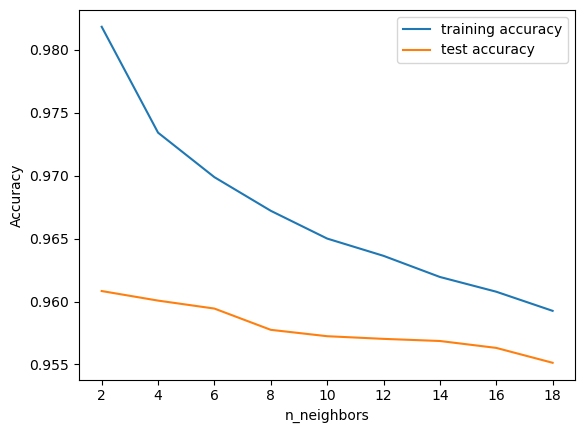

In [51]:
training_accuracy = []
test_accuracy = []
neighbors_settings = np.arange(2,20,2)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    print('n_neighbors,)

    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

clf_report = classification_report(y_test, logreg_pred)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))
print(f"Classification Report : \n{clf_report}")
          

### Naive Bayes Classifier

Average cross validation score: 0.688
Test accuracy: 0.686
F1 score: 0.666
Recall score: 0.839
Precision score: 0.552
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.59      0.70     14841
           1       0.55      0.84      0.67      8827

    accuracy                           0.69     23668
   macro avg       0.71      0.72      0.68     23668
weighted avg       0.75      0.69      0.69     23668



Text(50.722222222222214, 0.5, 'Actual Label')

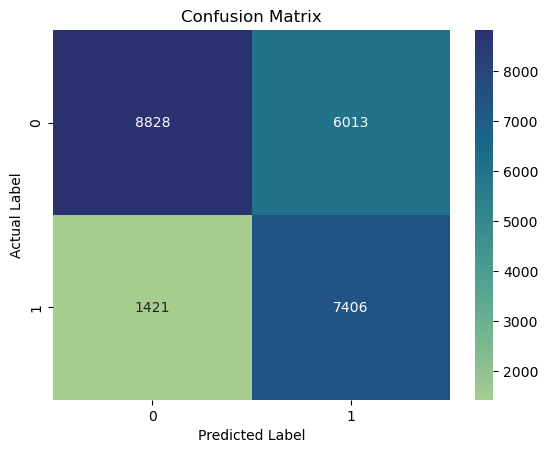

In [155]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
scores = cross_val_score(gnb, X_train, y_train, cv=5)
gnb_pred = gnb.predict(X_test)
clf_report = classification_report(y_test, gnb_pred)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(gnb.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, gnb_pred)))
print("Recall score: {:.3f}".format(recall_score(y_test, gnb_pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, gnb_pred)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, gnb_pred)
df_cm = pd.DataFrame(confusion)

ax=sns.heatmap(df_cm, annot=True,fmt="g",cmap="crest")
ax.set(title = "Confusion Matrix")
plt.xlabel('Predicted Label') # x-axis label with fontsize 15
plt.ylabel('Actual Label') # y-axis label with fontsize 15

In [151]:
scores

array([0.73782613, 0.73698109, 0.73713954, 0.73217492, 0.73206929])

### Multiple Layer Perceptron

#### Identity Activation Function

Train score: 0.795
Test accuracy: 0.796
F1 score: 0.684
[[13606  1235]
 [ 3596  5231]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     14841
           1       0.81      0.59      0.68      8827

    accuracy                           0.80     23668
   macro avg       0.80      0.75      0.77     23668
weighted avg       0.80      0.80      0.79     23668



<AxesSubplot:>

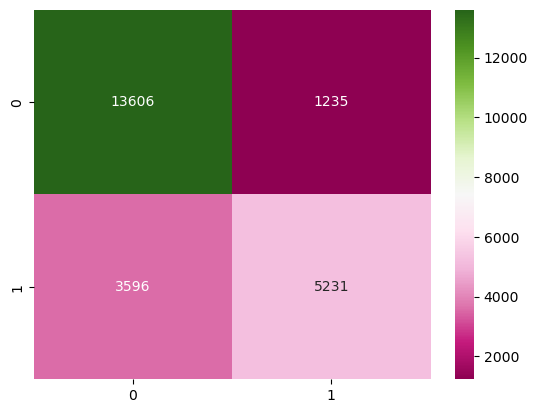

In [156]:
mlp = MLPClassifier(hidden_layer_sizes=[47, 20], alpha=0.001, solver='sgd', activation='identity')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
clf_report = classification_report(y_test, mlp_pred)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))
clf_report = classification_report(y_test, mlp_pred)
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, mlp_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="PiYG")

#### Sigmoid as Activation Function

Train score: 0.815
Test accuracy: 0.816
F1 score: 0.723
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     14841
           1       0.82      0.64      0.72      8827

    accuracy                           0.82     23668
   macro avg       0.82      0.78      0.79     23668
weighted avg       0.82      0.82      0.81     23668



<AxesSubplot:>

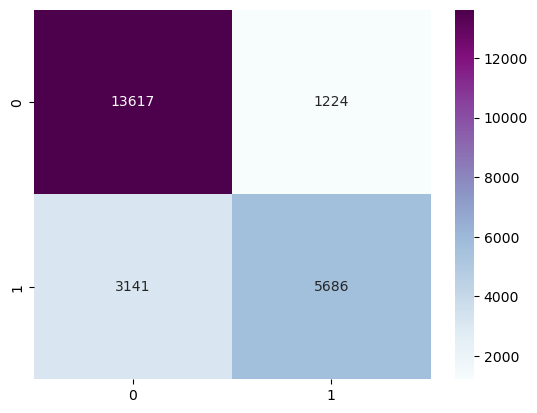

In [157]:
mlp = MLPClassifier(hidden_layer_sizes=[47, 20], alpha=0.001, solver='sgd', activation='logistic')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
clf_report = classification_report(y_test, mlp_pred)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
clf_report = classification_report(y_test, mlp_pred)
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, mlp_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="BuPu")

#### Hyperbolic Tangent as Activation Function

Train score: 0.852
Test accuracy: 0.851
F1 score: 0.789
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     14841
           1       0.84      0.75      0.79      8827

    accuracy                           0.85     23668
   macro avg       0.85      0.83      0.84     23668
weighted avg       0.85      0.85      0.85     23668



<AxesSubplot:>

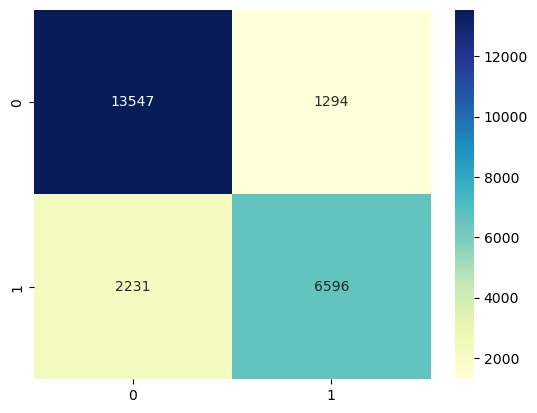

In [158]:
mlp = MLPClassifier(hidden_layer_sizes=[47, 20], alpha=0.001, solver='sgd', activation='tanh')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
clf_report = classification_report(y_test, mlp_pred)
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, mlp_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="YlGnBu")

#### Rectified Linear Unit Function

Train score: 0.855
Test accuracy: 0.851
F1 score: 0.790
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     14841
           1       0.83      0.75      0.79      8827

    accuracy                           0.85     23668
   macro avg       0.85      0.83      0.84     23668
weighted avg       0.85      0.85      0.85     23668



<AxesSubplot:>

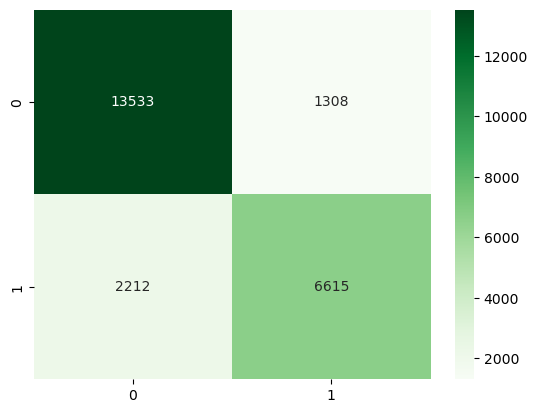

In [159]:
mlp = MLPClassifier(hidden_layer_sizes=[47, 20], alpha=0.001, solver='sgd', activation='relu')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
clf_report = classification_report(y_test, mlp_pred)
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, mlp_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="Greens")

### ID3

Average cross validation score: 0.749
Test accuracy: 0.751
F1 score: 0.500
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     14841
           1       0.83      0.75      0.79      8827

    accuracy                           0.85     23668
   macro avg       0.85      0.83      0.84     23668
weighted avg       0.85      0.85      0.85     23668



<AxesSubplot:>

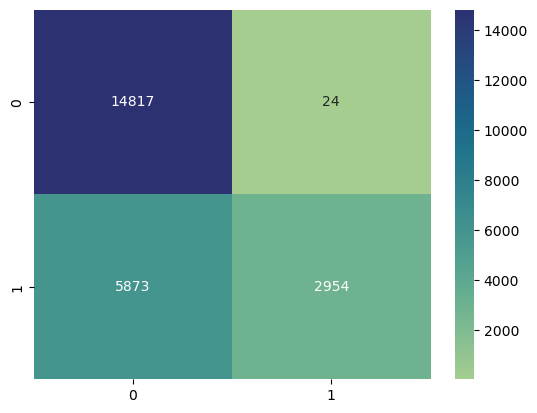

In [160]:
tree = DecisionTreeClassifier(criterion="entropy",max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, tree_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="crest")

### CART

Average cross validation score: 0.749
Test accuracy: 0.751
F1 score: 0.500
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     14841
           1       0.83      0.75      0.79      8827

    accuracy                           0.85     23668
   macro avg       0.85      0.83      0.84     23668
weighted avg       0.85      0.85      0.85     23668



<AxesSubplot:>

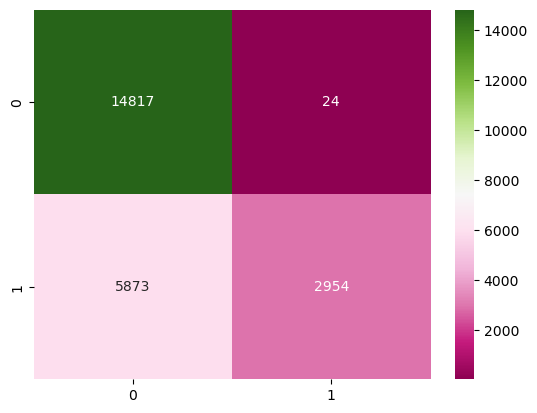

In [161]:
tree = DecisionTreeClassifier(criterion="gini",max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, tree_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="PiYG")

### Random Forest

Accuracy Score of Random Forest is : 0.8797110021970593
F1 score: 0.833
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     14841
           1       0.87      0.80      0.83      8827

    accuracy                           0.88     23668
   macro avg       0.88      0.86      0.87     23668
weighted avg       0.88      0.88      0.88     23668



<AxesSubplot:>

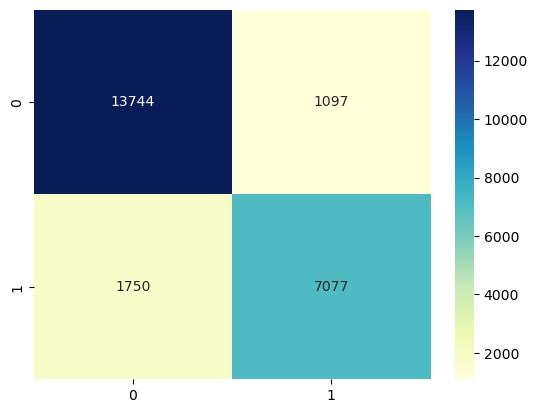

In [162]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred_rd_clf)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, y_pred_rd_clf)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g",cmap="YlGnBu")

## Tuning RF

In [196]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt',"log2"]
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10,15]
min_samples_leaf = [1, 2, 4,6,8]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

print(rf_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [197]:
rf = RandomForestClassifier(**rf_random.best_params_)
rf_random.fit(X_train, y_train)

classifier = RandomForestClassifier(n_estimators=500,max_depth=None)

classifier.fit(X_train,y_train)

pred_train = classifier.predict(X_train)
pred_test = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)
print(accuracy_train, accuracy_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.9940107742685117 0.8786969748183201
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=336; total time=   6.2s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=64; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=336; total time=  16.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=227; total time=  16.3s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=336; total time=   6.4s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=64; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min

## Second Approach

In [194]:
rf = RandomForestClassifier(n_estimators=500,max_depth=None)
rf_random.fit(X_train, y_train)

classifier = RandomForestClassifier(n_estimators=500,max_depth=None)

classifier.fit(X_train,y_train)

pred_train = classifier.predict(X_train)
pred_test = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [195]:
print(accuracy_train, accuracy_test)

0.9940107742685117 0.8800912624640865


In [200]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Fine tuning logistic Reg

In [203]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000,3000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced',],
    
}

In [206]:
import warnings
warnings.filterwarnings('ignore')

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=5, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)




Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogisticRegression(class_weight='balanced', random_state=1234,
                   solver='newton-cg')


In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=5, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogisticRegression(class_weight='balanced', random_state=1234,
                   solver='newton-cg')


In [210]:
y_pred = logModel_grid.predict(X_test)
print(y_pred)

[0 0 1 ... 1 1 0]


In [211]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[12261  2580]
 [ 2354  6473]] : is the confusion matrix 

0.7915328713875275 : is the accuracy score
0.7150115983651828 : is the precision score
0.7333182281635889 : is the recall score
0.724049217002237 : is the f1 score


Average cross validation score: 0.749
Test accuracy: 0.373
F1 score: 0.724
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83     14841
           1       0.72      0.73      0.72      8827

    accuracy                           0.79     23668
   macro avg       0.78      0.78      0.78     23668
weighted avg       0.79      0.79      0.79     23668



<AxesSubplot:>

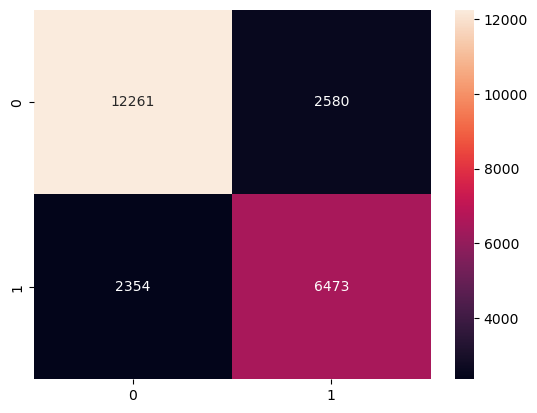

In [212]:
clf_report = classification_report(y_test, y_pred)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g")

### Weighted Logistic Regression

In [237]:
#class 0 is more frequent than class 1. so increase the class_weight of class 1 relative to class 0, for example {0:1, 1:9}. Or In our case, we will pass to our model dictionary weights of {0:21, 1:79}, specifying that class 1 is more critical than class 0.

weights = {0:21, 1:79} 

In [238]:
import warnings
warnings.filterwarnings('ignore')

param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': [{0:21, 1:79}],
    "penalty":["l1","l2"]
    
}

In [240]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=5, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/faridas

LogisticRegression(class_weight={0: 21, 1: 79}, random_state=1234,
                   solver='saga')


In [241]:
y_pred = logModel_grid.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [242]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[ 3769 11129]
 [  311  8459]] : is the confusion matrix 

0.5166469494676357 : is the accuracy score
0.4318460281805187 : is the precision score
0.9645381984036488 : is the recall score
0.5965865011636928 : is the f1 score


Average cross validation score: 0.790
Test accuracy: 0.371
F1 score: 0.597
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.25      0.40     14898
           1       0.43      0.96      0.60      8770

    accuracy                           0.52     23668
   macro avg       0.68      0.61      0.50     23668
weighted avg       0.74      0.52      0.47     23668



<AxesSubplot:>

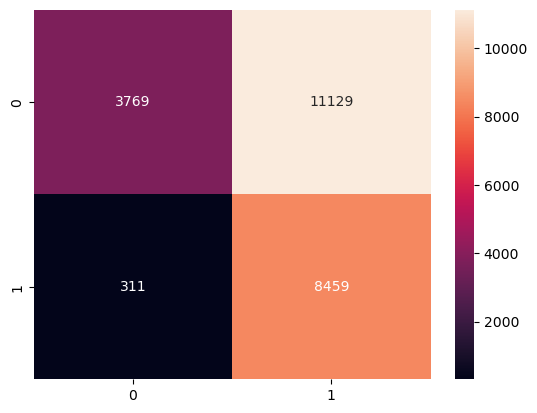

In [243]:
clf_report = classification_report(y_test, y_pred)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g")

### Finding optimal weights

In [262]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [263]:
lg3 = LogisticRegression(random_state=1234,max_iter=200,solver="newton-cg")
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid, cv=5,verbose=1, n_jobs=-1, refit=True)
grid.fit(X_train,y_train)


print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits


/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/scipy/opt

Best score: 0.7963874511460864 with param: {'class_weight': {0: 1.0, 1: 1.0}}


In [264]:
y_pred = logModel_grid.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [265]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[ 1438 13460]
 [    0  8770]] : is the confusion matrix 

0.43129964509041746 : is the accuracy score
0.3945119208277103 : is the precision score
1.0 : is the recall score
0.5658064516129032 : is the f1 score


Average cross validation score: 0.790
Test accuracy: 0.371
F1 score: 0.566
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.10      0.18     14898
           1       0.39      1.00      0.57      8770

    accuracy                           0.43     23668
   macro avg       0.70      0.55      0.37     23668
weighted avg       0.78      0.43      0.32     23668



<AxesSubplot:>

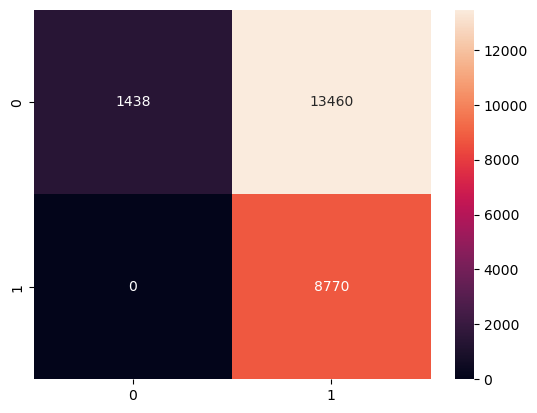

In [266]:
clf_report = classification_report(y_test, y_pred)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g")

In [267]:
opt={0: 1.0, 1: 1.0}

In [270]:

param_grid_lr = {
    'max_iter': [8000,10000,12000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': [opt]

    
}

In [271]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=5, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/faridasimaika/opt/anaconda3/lib/python3.9/site-packages/scipy/opt

LogisticRegression(class_weight={0: 1.0, 1: 1.0}, max_iter=8000,
                   random_state=1234, solver='newton-cg')


In [272]:
y_pred = logModel_grid.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


In [273]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[13675  1223]
 [ 3607  5163]] : is the confusion matrix 

0.7959269900287308 : is the accuracy score
0.8084873160037582 : is the precision score
0.5887115165336374 : is the recall score
0.6813143309580364 : is the f1 score


Average cross validation score: 0.790
Test accuracy: 0.371
F1 score: 0.681
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     14898
           1       0.81      0.59      0.68      8770

    accuracy                           0.80     23668
   macro avg       0.80      0.75      0.77     23668
weighted avg       0.80      0.80      0.79     23668



<AxesSubplot:>

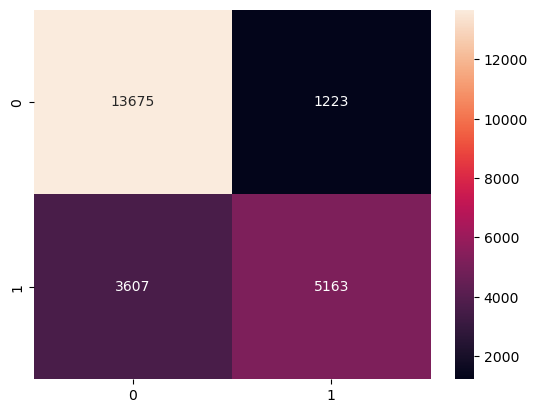

In [274]:
clf_report = classification_report(y_test, y_pred)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred)))
print(f"Classification Report : \n{clf_report}")
confusion = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True,fmt="g")

In [279]:
X_train.corr()

,hotel,lead_time,arrival_date_year,arrival_date_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
hotel,1.000000,0.074591,0.030882,0.005353,-0.006779,-0.052795,-0.014247,-0.004328,-0.077359,0.073672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,0.074591,1.000000,0.039978,0.133360,0.120832,-0.115465,0.084739,-0.073205,0.000448,0.171285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_year,0.030882,0.039978,1.000000,-0.526890,0.034144,0.012013,-0.119720,0.029510,0.032006,-0.057402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_month,0.005353,0.133360,-0.526890,1.000000,0.030726,-0.031648,0.037809,-0.022486,0.006769,0.020008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adults,-0.006779,0.120832,0.034144,0.030726,1.000000,-0.150330,-0.008013,-0.114600,-0.040711,-0.009424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_repeated_guest,-0.052795,-0.115465,0.012013,-0.031648,-0.150330,1.000000,0.084359,0.431763,0.014234,-0.021295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_cancellations,-0.014247,0.084739,-0.119720,0.037809,-0.008013,0.084359,1.000000,0.153594,-0.026991,0.005365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_bookings_not_canceled,-0.004328,-0.073205,0.029510,-0.022486,-0.114600,0.431763,0.153594,1.000000,0.012422,-0.009266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booking_changes,-0.077359,0.000448,0.032006,0.006769,-0.040711,0.014234,-0.026991,0.012422,1.000000,-0.012488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_in_waiting_list,0.073672,0.171285,-0.057402,0.020008,-0.009424,-0.021295,0.005365,-0.009266,-0.012488,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
df["is_canceled"].value_counts()

0    74250
1    44088
Name: is_canceled, dtype: int64

In [10]:
import numpy as np
a=np.array([1,2,3],
           [4,5,6])

TypeError: Field elements must be 2- or 3-tuples, got '4'

In [11]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr)

[[1 2 3]
 [4 5 6]]


In [13]:
arr[0][2]

3